In [1]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X+ np.random.randn(m, 1)

In [2]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [3]:
theta_best

array([[4.21509616],
       [2.77011339]])

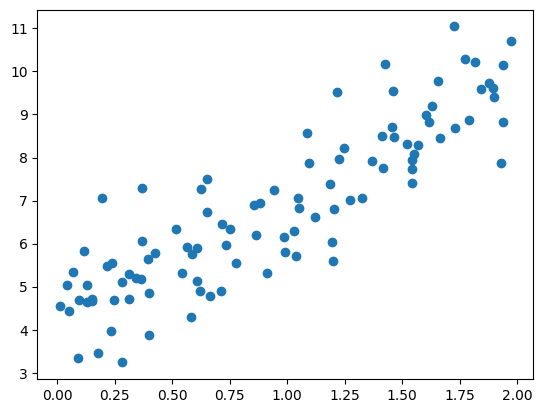

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.plot()
plt.show()

[[0]
 [2]]
[[1. 0.]
 [1. 2.]]


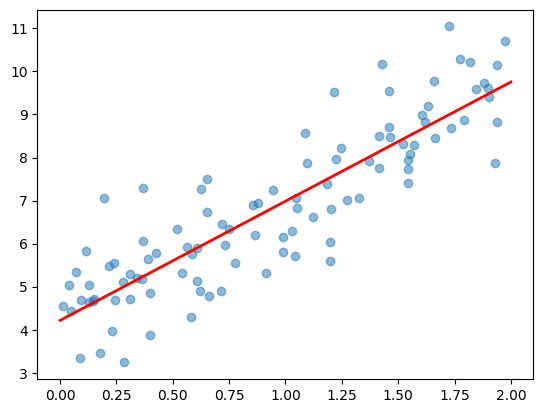

In [5]:
import matplotlib.pyplot as plt

X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
print(X_new)
print(X_new_b)
y_pred = X_new_b @ theta_best

plt.scatter(X, y, alpha=0.5)
plt.plot(X_new, y_pred, "r-", linewidth=2)
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

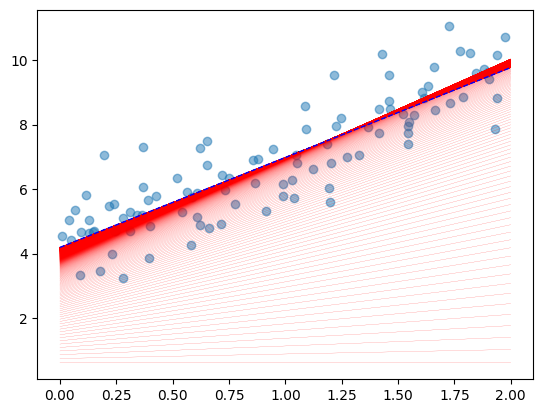

In [7]:
eta = 0.01
n_epochs = 1000
m = len(X_b)
np.random.seed(42)
theta = np.random.randn(2, 1)
plt.scatter(X, y, alpha=0.5)
for epoch in range(n_epochs):
    gradients = (2 / m) * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients
    y_pred = X_new_b @ theta
    plt.plot(X_new, y_pred, "r-", linewidth=0.1)
plt.plot(X_new, y_pred, "b--", linewidth=1)
plt.show()

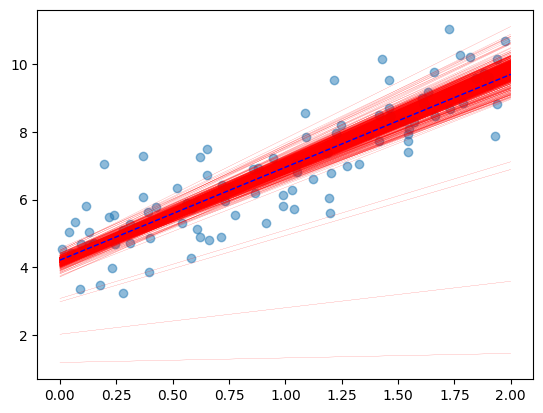

array([[4.21076011],
       [2.74856079]])

In [8]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)
plt.scatter(X, y, alpha=0.5)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        y_pred = X_new_b @ theta
        plt.plot(X_new, y_pred, "r-", linewidth=0.1)
plt.plot(X_new, y_pred, "b--", linewidth=1)
plt.show()
theta

In [9]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + np.random.randn(m, 1)

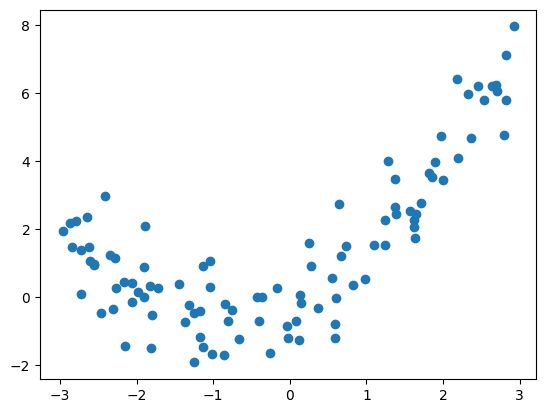

In [19]:
plt.scatter(X, y)

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X, X_poly

(array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816],
        [-2.06403288],
        [-2.65149833],
        [ 2.19705687],
        [ 0.60669007],
        [ 1.24843547],
        [-2.87649303],
        [ 2.81945911],
        [ 1.99465584],
        [-1.72596534],
        [-1.9090502 ],
        [-1.89957294],
        [-1.17454654],
        [ 0.14853859],
        [-0.40832989],
        [-1.25262516],
        [ 0.67111737],
        [-2.16303684],
        [-1.24713211],
        [-0.80182894],
        [-0.26358009],
        [ 1.71105577],
        [-1.80195731],
        [ 0.08540663],
        [ 0.55448741],
        [-2.72129752],
        [ 0.64526911],
        [-1.97685526],
        [-2.60969044],
        [ 2.69331322],
        [ 2.7937922 ],
        [ 1.85038409],
        [-1.17231738],
        [-2.41396732],
        [ 1.10539816],
        [-0.35908504],
        [-2.26777059],
        [-0.02893854],
        [-2.79366887],
        [ 2

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([-0.21865419]), array([[0.93366893, 0.56456263]]))

In [25]:
X

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007],
       [ 1.24843547],
       [-2.87649303],
       [ 2.81945911],
       [ 1.99465584],
       [-1.72596534],
       [-1.9090502 ],
       [-1.89957294],
       [-1.17454654],
       [ 0.14853859],
       [-0.40832989],
       [-1.25262516],
       [ 0.67111737],
       [-2.16303684],
       [-1.24713211],
       [-0.80182894],
       [-0.26358009],
       [ 1.71105577],
       [-1.80195731],
       [ 0.08540663],
       [ 0.55448741],
       [-2.72129752],
       [ 0.64526911],
       [-1.97685526],
       [-2.60969044],
       [ 2.69331322],
       [ 2.7937922 ],
       [ 1.85038409],
       [-1.17231738],
       [-2.41396732],
       [ 1.10539816],
       [-0.35908504],
       [-2.26777059],
       [-0.02893854],
       [-2.79366887],
       [ 2.45592241],
       [-1.44732011],
       [ 0

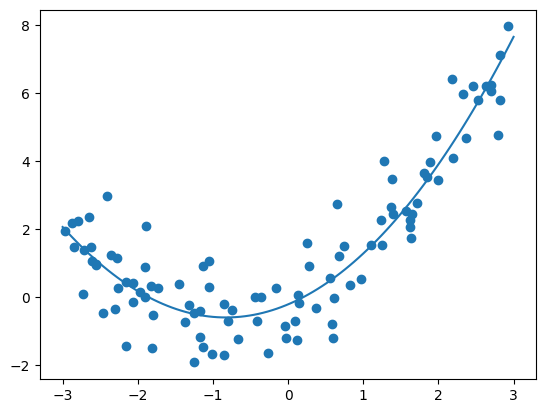

In [30]:
X_for_preds_prepare = 6 * np.linspace(0, 1, num=100) - 3
X_for_preds = poly_features.fit_transform(X_for_preds_prepare.reshape(-1, 1))
y_for_preds = lin_reg.predict(X_for_preds)
plt.scatter(X, y)
plt.plot(X_for_preds_prepare, y_for_preds)

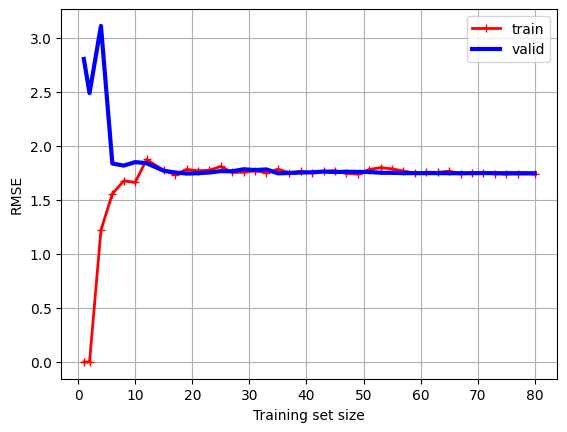

In [33]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1, 40), cv=5, scoring="neg_root_mean_squared_error"
)

train_errors = -train_scores.mean(axis=1)
valid_errors = - valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend()
plt.show()